In [41]:
#pip install matplotlib numpy pandas seaborn

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.pyplot import figure
import seaborn as sns
import random
import sys
from itertools import combinations
import scipy.cluster.hierarchy as shc
import importlib 
%cd ..
from src import bingo, evolution_simulator

/home/mounim/Projects/BiNGO-3C


In [42]:
bingo.get_max_cores()

12

## 1 - simulated dataset

In [43]:
#set version-name and input sequence
id = "Test01"
L = 100
O = evolution_simulator.generate_random_seq(L) #sequence of lenght L
# evolution_simulator.to_fasta(O,id, "../data/simulated_dataset/") #sequence of lenght L
#add x mutations
X = 30 
evolution_simulator.add_n_mutations(O,X)

'CGAGTACCTAAGAGGCACACTGTAAAACCTTCCGGCGAATGGTGCTCTTCGAAGTAGCCCCATTATGCCTACCAACTGGTGTCTCGTATGTACATTGGTTGGTA'

In [44]:
importlib.reload(bingo)
version = "Random_sequence"
L = 10000
P0 = 0.1 # mutation rate
P = 0.04 # mutation rate
generations = 15
O = evolution_simulator.generate_random_seq(L) #sequence of lenght L
simulated_dataset = {}
main_branches = ["A", "B"]
for branch in main_branches:
    parent = evolution_simulator.add_p_mutations(O, P0)
    simulated_dataset[branch] = parent
    for gen in range(generations):
        parent = evolution_simulator.add_p_mutations(parent, P)
        # print(branch+str(gen))
        simulated_dataset[branch+str(gen)]=parent

# export result to file
bingo.dict_to_fasta(simulated_dataset)

IndexError: string index out of range

In [ ]:
import os
os.getcwd()

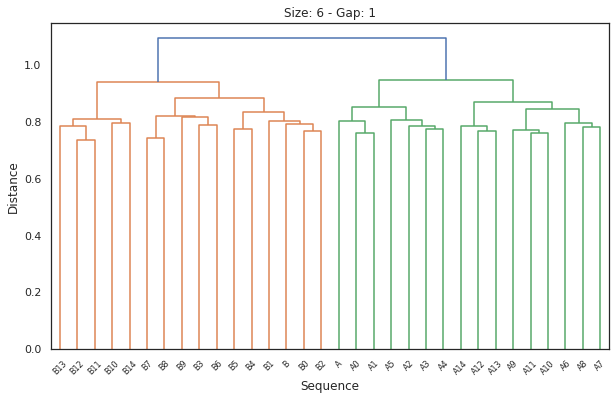

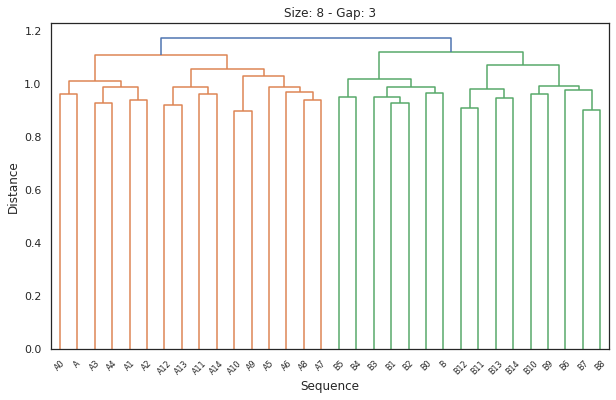

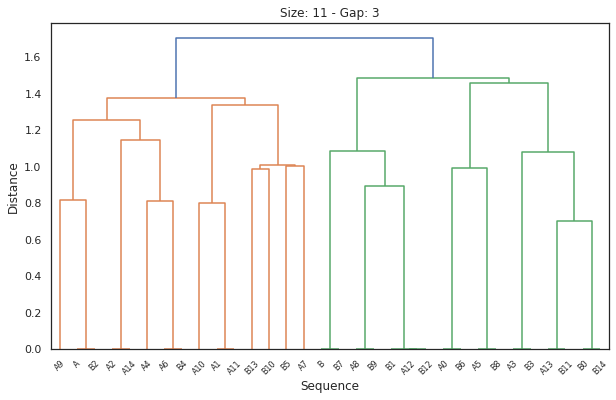

In [ ]:
d = 6 # delimiter size
# delim = bingo.random_delimiter(d) #select delimiter

parameters = [[6,1,1],
              [8,3,1.15],
              [11,3,1.6] ]

for par in parameters:
    size = par[0]
    gap = par[1]
    thre = par[2]
    importlib.reload(bingo)
    dictSeqs = bingo.dict_of_seqs_from_fasta_file("./data/1 - simulated_dataset/simulated_dataset.fasta" ) #load from file
    dicSubseqs = bingo.dictSubSeq_from_dictSeq(dictSeqs, delim) #remake seqs using delim
    words = bingo.generate_words_from_dictSeq(dicSubseqs, s=size, w=gap, verbose=False, n_parallel=5, convert_to_binary=True)
    scores = bingo. compute_jaccard_scores(words, n_parallel=5)
    # bingo.plot_clustermap(scores, method='average', cmap='Spectral_r', show=True)
    bingo.plot_dendrogram(scores, method='ward', show=True, figsize =[10,6], color_threshold = thre, title = 'Size: ' + str(size) + ' - Gap: '+ str(gap) )


## Variable w and g

In [ ]:
version = "Random_sequence"
L = 10000
P0 = 0.1 # mutation rate
P = 0.04 # mutation rate
generations = 15
O = evolution_simulator.generate_random_seq(L) #sequence of lenght L
simulated_dataset = {}
main_branches = ["A", "B"]
for branch in main_branches:
    parent = evolution_simulator.add_p_mutations(O, P0)
    simulated_dataset[branch] = parent
    for gen in range(generations):
        parent = evolution_simulator.add_p_mutations(parent, P)
        # print(branch+str(gen))
        simulated_dataset[branch+str(gen)]=parent

# export result to file
bingo.dict_to_fasta(simulated_dataset)

In [ ]:
import pandas as pd
## set size and gap: no gaps (step = 1)
d = 5 # delimiter size
delim = bingo.random_delimiter(d) #select delimiter
dictSeqs = bingo.dict_of_seqs_from_fasta_file("./data/1 - simulated_dataset/simulated_dataset.fasta" ) #load from file
dicSubseqs = bingo.dictSubSeq_from_dictSeq(dictSeqs, delim) #remake seqs using delim
predict = {}
Rslt = []

for size in range(3, 150, 2):
    for gap in range(1, 101, 3):
        words = bingo.generate_words_from_dictSeq(dicSubseqs, s=size, w=gap, verbose=False, n_parallel=8, convert_to_binary=True)
        Rslt = []
        for i in words.keys():  # S1: ref
            for j in words.keys():  # S2: target
                if i != j:
                    INT = set(words[i]).intersection(words[j])
                    UNI = set(words[i]).union(words[j])
                    Score = len(INT) / len(UNI) if UNI else 0
                    Rslt.append([i, len(words[i]), j, len(words[j]), len(INT), len(UNI), Score])

        df = pd.DataFrame(Rslt, columns=['Ref1', 'LenRef1', 'Ref2', 'LenRef2', 'INT', 'UNI', 'SCORE'])

        df_sorted = df.sort_values('SCORE', ascending=False).drop_duplicates('Ref1')
        df_sorted['s1'] = df_sorted['Ref1'].str.extract('(\D+)')
        df_sorted['s2'] = df_sorted['Ref2'].str.extract('(\D+)')
        df_sorted['correct'] = df_sorted['s1'] == df_sorted['s2']
        crt = df_sorted['correct'].value_counts().to_dict()

        print(f"{size}_{gap}", crt)
        predict[f"{size}_{gap}"] = crt


3_1 {True: 16, False: 16}
3_4 {True: 16, False: 16}
3_7 {True: 16, False: 16}
3_10 {True: 16, False: 16}
3_13 {True: 16, False: 16}
3_16 {True: 16, False: 16}
3_19 {True: 16, False: 16}
3_22 {False: 17, True: 15}
3_25 {True: 17, False: 15}
3_28 {True: 16, False: 16}
3_31 {False: 20, True: 12}
3_34 {False: 18, True: 14}
3_37 {True: 17, False: 15}
3_40 {False: 19, True: 13}
3_43 {True: 17, False: 15}
3_46 {True: 22, False: 10}
3_49 {False: 20, True: 12}
3_52 {False: 18, True: 14}
3_55 {True: 20, False: 12}
3_58 {False: 17, True: 15}
3_61 {True: 17, False: 15}
3_64 {True: 19, False: 13}
3_67 {True: 17, False: 15}
3_70 {False: 16, True: 16}
3_73 {True: 17, False: 15}
3_76 {True: 18, False: 14}
3_79 {True: 16, False: 16}
3_82 {False: 17, True: 15}
3_85 {True: 17, False: 15}
3_88 {False: 16, True: 16}
3_91 {True: 20, False: 12}
3_94 {True: 21, False: 11}
3_97 {True: 18, False: 14}
3_100 {True: 19, False: 13}
5_1 {True: 28, False: 4}
5_4 {True: 32}
5_7 {True: 31, False: 1}
5_10 {True: 31, Fal

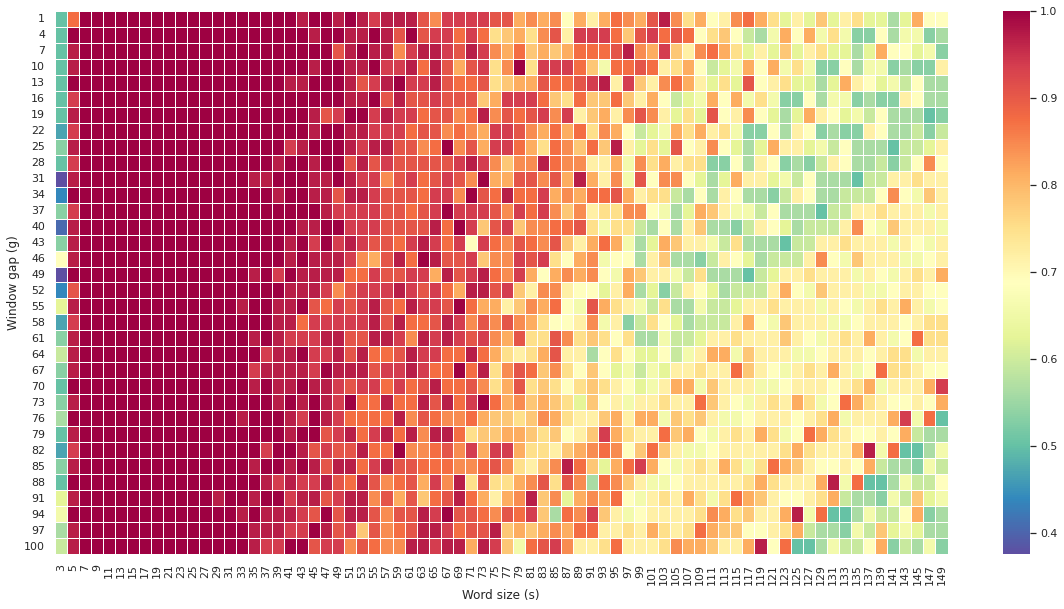

In [ ]:
matrix = pd.DataFrame(predict).T
matrix['Accuracy'] = matrix.iloc[:,0]/32
matrix['i'] = matrix.index
matrix['w'] = matrix['i'].str.split('_',expand=True)[0].astype('int')
matrix['g'] = matrix['i'].str.split('_',expand=True)[1].astype('int')
MTX = matrix[['Accuracy','w','g']]

Matrices = pd.pivot_table(matrix, values='Accuracy', index=['g'], columns=['w'], aggfunc=np.average, fill_value=0.5)
# map = sns.clustermap(Matrices, method='ward', row_cluster=False, col_cluster=False , tree_kws=dict(linewidths=2 ), figsize=(25, 25), cmap= 'Spectral' )
fig, ax = plt.subplots(figsize=(20,10))         # Sample figsize in inches
sns.heatmap(Matrices,ax=ax, lw=.5, cmap= 'Spectral_r' )
plt.xlabel('Word size (s)')
plt.ylabel('Window gap (g)')
plt.show()


# Real Dataset 1: Beta-Corona Virus (Na Zhu 2020) 

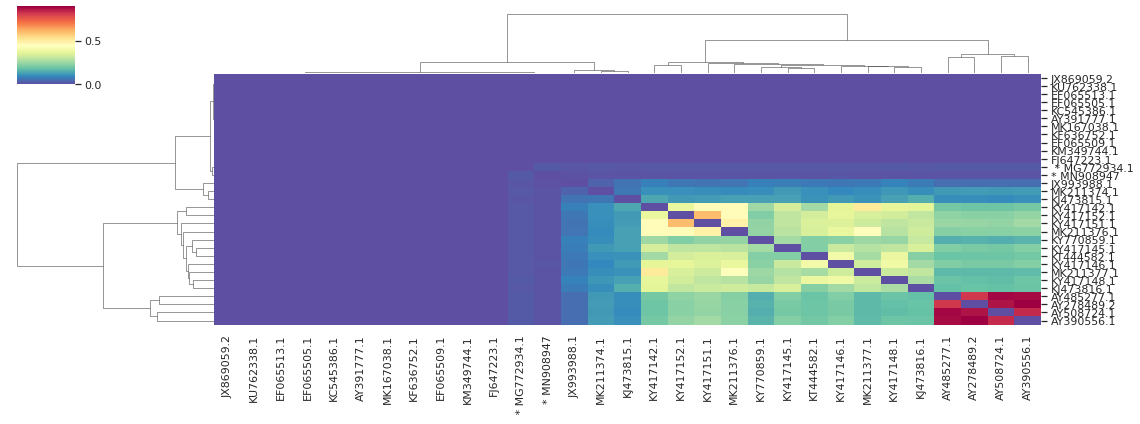

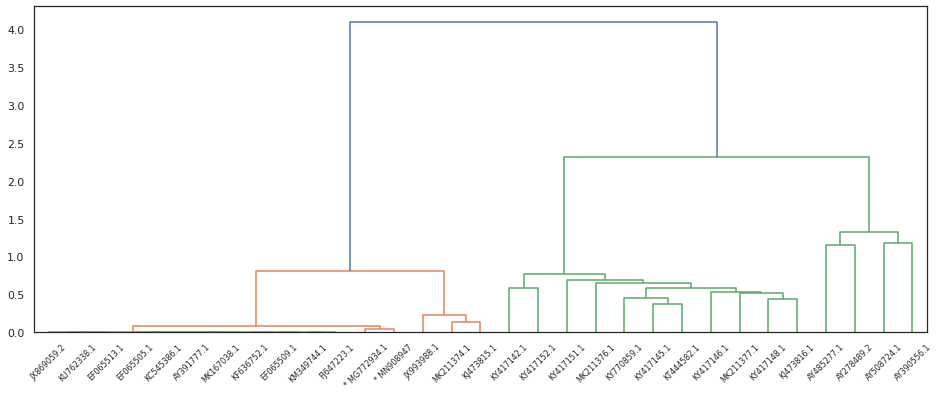

In [ ]:
importlib.reload(bingo)

size, gap = 30,10
d = 4 # delimiter size

dictSeqs = bingo.dict_of_seqs_from_fasta_file("./data/2 - dataset1/Na Zhu 2020.fasta")
delim = bingo.random_delimiter(d) #select delimiter
dicSubseqs = bingo.dictSubSeq_from_dictSeq(dictSeqs, delim) #remake seqs using delim
words = bingo.generate_words_from_dictSeq(dicSubseqs, s=size, w=gap, verbose=False, n_parallel=5, convert_to_binary=True)
scores = bingo. compute_jaccard_scores(words, n_parallel=5)
bingo.plot_clustermap(scores, method='ward', metric='euclidean', cmap='Spectral_r', show=True, figsize=[16,6])
# bingo.plot_dendrogram(scores, method='average', show=True)


# Dataset 3: SARS-CoV-2

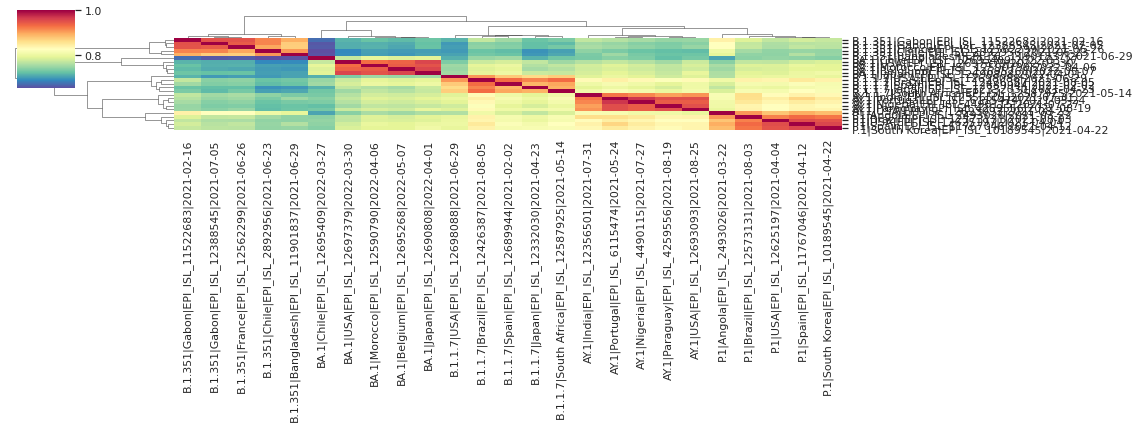

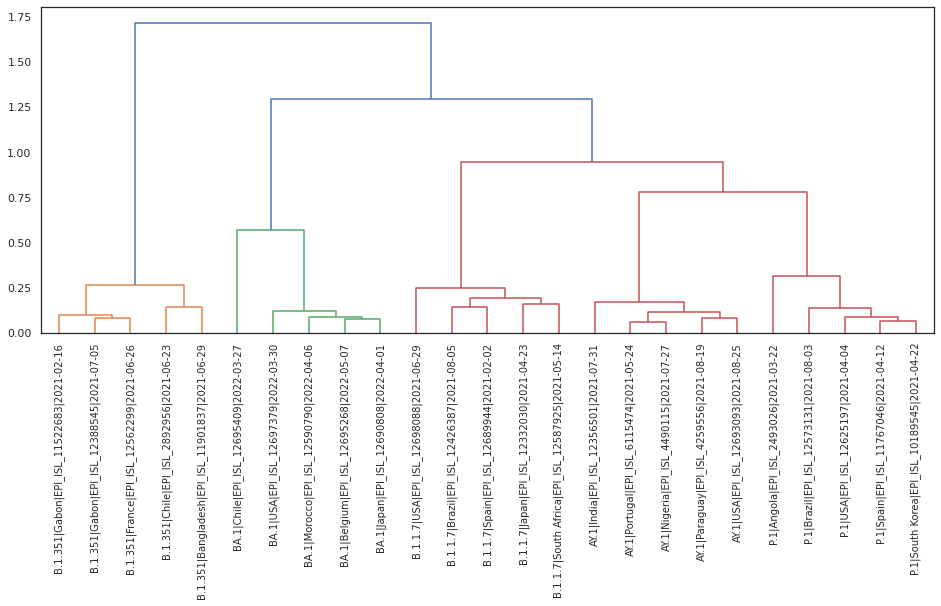

In [ ]:
importlib.reload(bingo)

size, gap = 25,10
d = 4 # delimiter size
dictSeqs = bingo.dict_of_seqs_from_fasta_file("./data/3 - dataset2/Essabbar A 2021.fasta" ) #load from file
delim = bingo.random_delimiter(d) #select delimiter
dicSubseqs = bingo.dictSubSeq_from_dictSeq(dictSeqs, delim) #remake seqs using delim
words = bingo.generate_words_from_dictSeq(dicSubseqs, s=size, w=gap, verbose=False, n_parallel=5, convert_to_binary=True)
scores = bingo. compute_jaccard_scores(words, n_parallel=5)
bingo.plot_clustermap(scores, method='ward', metric='euclidean', cmap='Spectral_r', show=True, figsize=[16,6])


# Dataset 4: mtDNA

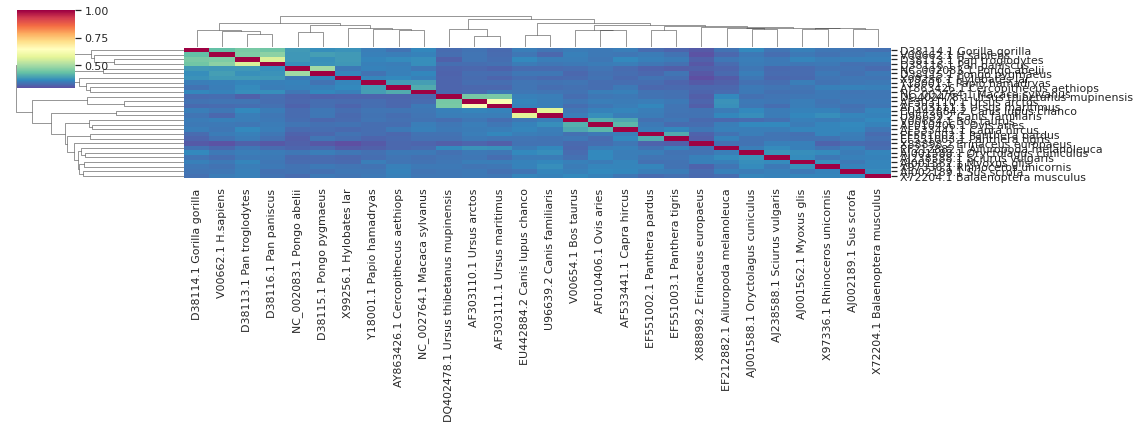

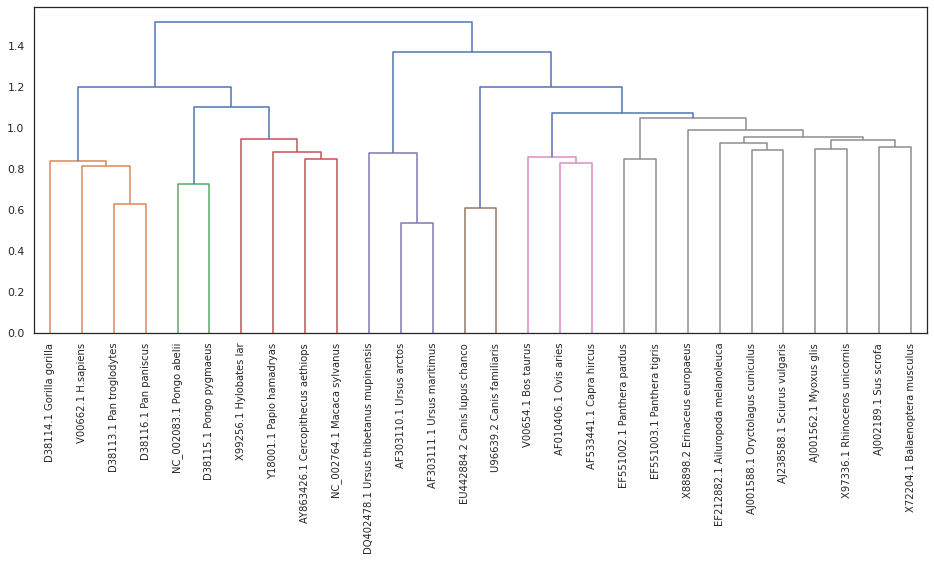

In [ ]:
importlib.reload(bingo)

size, gap = 6,2
d = 4 # delimiter size
dictSeqs = bingo.dict_of_seqs_from_fasta_file("./data/4 - dataset4/mtDNA.fasta" ) #load from file
delim = bingo.random_delimiter(d) #select delimiter
dicSubseqs = bingo.dictSubSeq_from_dictSeq(dictSeqs, delim) #remake seqs using delim
words = bingo.generate_words_from_dictSeq(dicSubseqs, s=size, w=gap, verbose=False, n_parallel=5, convert_to_binary=True)
scores = bingo. compute_jaccard_scores(words, n_parallel=5)
bingo.plot_clustermap(scores, method='ward', metric='euclidean', cmap='Spectral_r', show=True, figsize=[16,6])


# Benchmark size

In [ ]:
sys.getsizeof(dictSeq["seq1"])

69

3,1,1,24,50,28
3,1,10,24,50,28
3,1,100,24,50,28
3,10,1,24,52,28
3,10,10,24,52,28
3,10,100,24,52,28
3,100,1,24,52,28
3,100,10,24,52,28
3,100,100,24,52,28
4,1,1,32,100,56
4,1,10,32,50,28
4,1,100,32,50,28
4,10,1,32,53,28
4,10,10,32,53,28
4,10,100,32,53,28
4,100,1,32,53,28
4,100,10,32,53,28
4,100,100,32,53,28
5,1,1,40,100,56
5,1,10,40,50,28
5,1,100,40,50,28
5,10,1,40,54,28
5,10,10,40,54,28
5,10,100,40,54,28
5,100,1,40,54,28
5,100,10,40,54,28
5,100,100,40,54,28
6,1,1,48,100,52
6,1,10,48,50,24
6,1,100,48,50,24
6,10,1,48,55,28
6,10,10,48,55,28
6,10,100,48,55,28
6,100,1,48,55,28
6,100,10,48,55,28
6,100,100,48,55,28
7,1,1,56,100,56
7,1,10,56,50,28
7,1,100,56,50,28
7,10,1,56,56,28
7,10,10,56,56,28
7,10,100,56,56,28
7,100,1,56,56,28
7,100,10,56,56,28
7,100,100,56,56,28
8,1,1,64,150,84
8,1,10,64,50,28
8,1,100,64,50,28
8,10,1,64,57,28
8,10,10,64,57,28
8,10,100,64,57,28
8,100,1,64,57,28
8,100,10,64,57,28
8,100,100,64,57,28
9,1,1,72,150,84
9,1,10,72,50,28
9,1,100,72,50,28
9,10,1,72,58,28
9,10,10,72,5

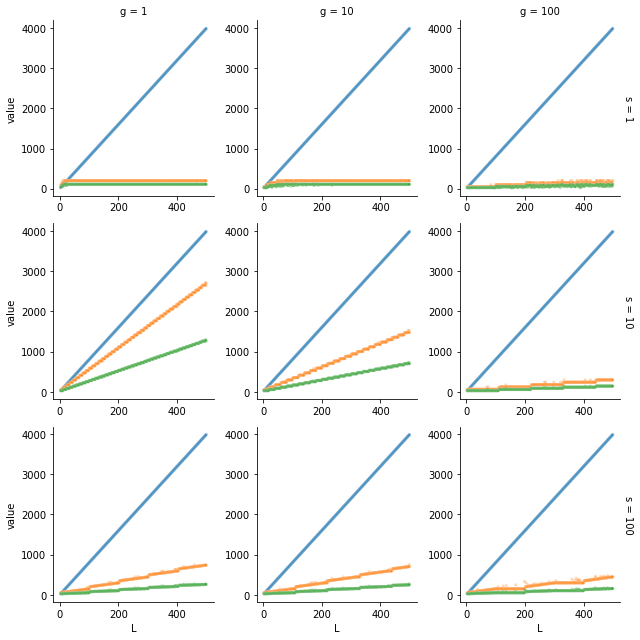

In [96]:
logfile = open('sizes.txt', 'w+')

for L in range(3,500,1): 
# for L in [1000]: 
    O = evolution_simulator.generate_random_seq(L) #sequence of lenght L
    dictSeq = {"seq1": O}
    for s in [1, 10, 50, 100]:
        for g in [1, 10, 50, 100]:
            d = 6 # delimiter size
            delimiter = bingo.random_delimiter(d) #select delimiter
            # 1. Compute the size of the original DNA sequence
            original_size = sys.getsizeof(dictSeq["seq1"])
            original_size = len(dictSeq["seq1"]) * 8

            # 2. Split into subsequences
            subsequences = bingo.dictSubSeq_from_dictSeq(dictSeq, delimiter)
            subseq_size = sum( sys.getsizeof(word) for word in subsequences["seq1"] )
            # subseq_size = sum(len(seq) * 8 for seq in subsequences["seq1"])

            # 3. Generate words from the subsequences
            words = bingo.generate_words_from_dictSeq(subsequences, s=s, w=g)
            words_size = sum( sys.getsizeof(word) for word in words["seq1"] )
            # words_size = sum(8 *len(word) for word in words["seq1"])

            # 4. Convert words to binary and compute size
            mapping = {'A': '00', 'C': '01', 'G': '10', 'T': '11'}
            binary_words = bingo.generate_words_from_dictSeq(subsequences, s=s, w=g, convert_to_binary=True)
            binary_words_size = sum(sys.getsizeof(word) for word in binary_words["seq1"])

            logfile.write(','.join([str(L), str(s), str(g), str(original_size), str(words_size), str(binary_words_size), '\n']))
            print(','.join([str(L), str(s), str(g), str(original_size), str(words_size), str(binary_words_size)]))



# Reading the data from a CSV file
df = pd.read_csv('./sizes.txt', header=None)
df.columns = ['L', 's', 'g', 'DNA Sequence', 'Words', 'Binary Words', '']

# # Melting the dataframe for use with Seaborn
df_melted = df.melt(id_vars=['g', 's', 'L'], value_vars=['DNA Sequence', 'Words', 'Binary Words'])
# display(df_melted.sample())

g = sns.FacetGrid(df_melted, col='g', row='s', margin_titles=True, sharex=False, sharey=False)
g.map_dataframe(sns.scatterplot, x='L', y='value', hue='variable', alpha=0.3, s=10)

plt.show()

3 1 1
3 1 10
3 1 50
3 1 100
3 10 1
3 10 10
3 10 50
3 10 100
3 50 1
3 50 10
3 50 50
3 50 100
3 100 1
3 100 10
3 100 50
3 100 100
4 1 1
4 1 10
4 1 50
4 1 100
4 10 1
4 10 10
4 10 50
4 10 100
4 50 1
4 50 10
4 50 50
4 50 100
4 100 1
4 100 10
4 100 50
4 100 100
5 1 1
5 1 10
5 1 50
5 1 100
5 10 1
5 10 10
5 10 50
5 10 100
5 50 1
5 50 10
5 50 50
5 50 100
5 100 1
5 100 10
5 100 50
5 100 100
6 1 1
6 1 10
6 1 50
6 1 100
6 10 1
6 10 10
6 10 50
6 10 100
6 50 1
6 50 10
6 50 50
6 50 100
6 100 1
6 100 10
6 100 50
6 100 100
7 1 1
7 1 10
7 1 50
7 1 100
7 10 1
7 10 10
7 10 50
7 10 100
7 50 1
7 50 10
7 50 50
7 50 100
7 100 1
7 100 10
7 100 50
7 100 100
8 1 1
8 1 10
8 1 50
8 1 100
8 10 1
8 10 10
8 10 50
8 10 100
8 50 1
8 50 10
8 50 50
8 50 100
8 100 1
8 100 10
8 100 50
8 100 100
9 1 1
9 1 10
9 1 50
9 1 100
9 10 1
9 10 10
9 10 50
9 10 100
9 50 1
9 50 10
9 50 50
9 50 100
9 100 1
9 100 10
9 100 50
9 100 100
10 1 1
10 1 10
10 1 50
10 1 100
10 10 1
10 10 10
10 10 50
10 10 100
10 50 1
10 50 10
10 50 50
10 50 100


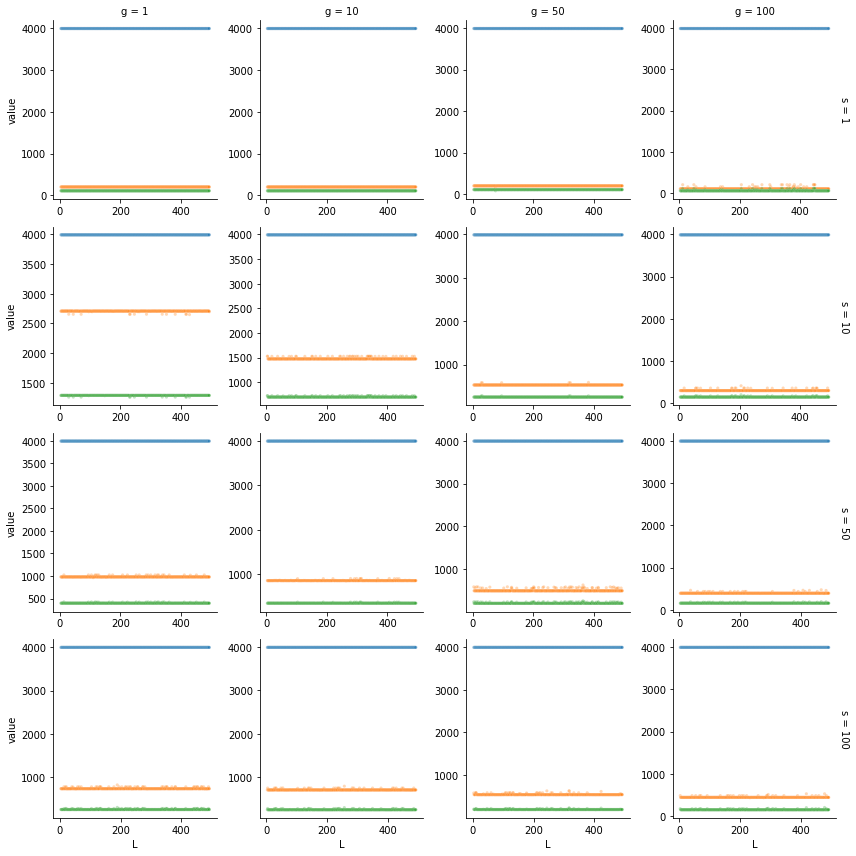

In [97]:
logfile = open('sizes_L.txt', 'w+')

for L in range(3,500,1): 
# for L in [1000]: 
    O = evolution_simulator.generate_random_seq(L) #sequence of lenght L
    for s in [1, 10, 50, 100]:
        for g in [1, 10, 50, 100]:
            d = 6 # delimiter size
            print(L, s,g)
            delimiter = bingo.random_delimiter(d) #select delimiter
            # 1. Compute the size of the original DNA sequence
            original_size = sys.getsizeof(dictSeq["seq1"])
            original_size = len(dictSeq["seq1"]) * 8

            # 2. Split into subsequences
            subsequences = bingo.dictSubSeq_from_dictSeq(dictSeq, delimiter)
            subseq_size = sum( sys.getsizeof(word) for word in subsequences["seq1"] )
            # subseq_size = sum(len(seq) * 8 for seq in subsequences["seq1"])

            # 3. Generate words from the subsequences
            words = bingo.generate_words_from_dictSeq(subsequences, s=s, w=g)
            words_size = sum( sys.getsizeof(word) for word in words["seq1"] )
            # words_size = sum(8 *len(word) for word in words["seq1"])

            # 4. Convert words to binary and compute size
            mapping = {'A': '00', 'C': '01', 'G': '10', 'T': '11'}
            binary_words = bingo.generate_words_from_dictSeq(subsequences, s=s, w=g, convert_to_binary=True)
            binary_words_size = sum(sys.getsizeof(word) for word in binary_words["seq1"])

            logfile.write(','.join([str(L), str(s), str(g), str(original_size), str(words_size), str(binary_words_size), '\n']))
            # print(','.join([str(L), str(s), str(g), str(original_size), str(words_size), str(binary_words_size)]))



# Reading the data from a CSV file
df = pd.read_csv('./sizes_L.txt', header=None)
df.columns = ['L', 's', 'g', 'DNA Sequence', 'Words', 'Binary Words', '']

# # Melting the dataframe for use with Seaborn
df_melted = df.melt(id_vars=['g', 's', 'L'], value_vars=['DNA Sequence', 'Words', 'Binary Words'])
# display(df_melted.sample())

g = sns.FacetGrid(df_melted, col='g', row='s', margin_titles=True, sharex=False, sharey=False)
g.map_dataframe(sns.scatterplot, x='L', y='value', hue='variable', alpha=0.3, s=10)

plt.show()

